In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


import pickle

In [2]:
df = pd.read_csv(r"C:\Users\USER\Desktop\DataGin_Python_Project\Data_Science\Nigeria_Student_Dropout_Data.csv")

In [3]:
## df.to_csv('Academic_Performace_Data.csv', index = False)

df.describe()

,Student_ID,JAMB_Score,Academic_Year,Financial_Aid,Disciplinary_Count,Internet_Access,Library_Usage,Cumulative_GPA,Attendance_Rate,Predicted_Dropout
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,266.001000,2.495667,0.294667,0.407667,0.594333,10.136667,3.199692,0.479946,0.180000
std,866.169729,50.075765,1.115824,0.455969,0.901709,0.491102,6.058236,0.792763,0.157137,0.384252
min,1.000000,180.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.100000,0.000000
25%,750.750000,222.000000,1.000000,0.000000,0.000000,0.000000,5.000000,2.659001,0.371283,0.000000
50%,1500.500000,268.000000,3.000000,0.000000,0.000000,1.000000,10.000000,3.205594,0.480602,0.000000
75%,2250.250000,310.000000,3.000000,1.000000,0.000000,1.000000,15.000000,3.745801,0.588643,0.000000
max,3000.000000,350.000000,4.000000,1.000000,5.000000,1.000000,20.000000,5.000000,0.839483,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          3000 non-null   int64  
 1   JAMB_Score          3000 non-null   int64  
 2   State_of_Origin     3000 non-null   object 
 3   Distance_Category   3000 non-null   object 
 4   Program_Type        3000 non-null   object 
 5   Academic_Year       3000 non-null   int64  
 6   Financial_Aid       3000 non-null   int64  
 7   Disciplinary_Count  3000 non-null   int64  
 8   Internet_Access     3000 non-null   int64  
 9   Library_Usage       3000 non-null   int64  
 10  Cumulative_GPA      3000 non-null   float64
 11  Attendance_Rate     3000 non-null   float64
 12  Predicted_Dropout   3000 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 304.8+ KB


In [5]:
df.head(2)

,Student_ID,JAMB_Score,State_of_Origin,Distance_Category,Program_Type,Academic_Year,Financial_Aid,Disciplinary_Count,Internet_Access,Library_Usage,Cumulative_GPA,Attendance_Rate,Predicted_Dropout
0,1,282,Other,Regional,Science,1,0,0,0,0,2.766964,0.392876,0
1,2,272,Rivers,Local,Arts,3,0,0,1,10,3.017516,0.442986,0


In [6]:
df['State_of_Origin'].unique()

array(['Other', 'Rivers', 'Oyo', 'Enugu', 'Kano', 'Lagos'], dtype=object)

In [7]:
gpa = df['Cumulative_GPA']
attendance = df['Attendance_Rate']

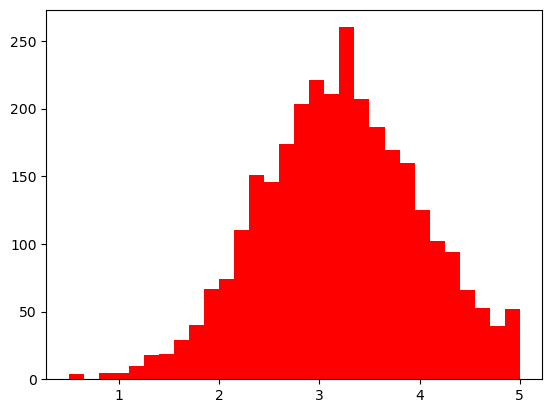

In [8]:
plt.subplot
plt.hist(gpa, bins = 30, color = 'red')
plt.show()

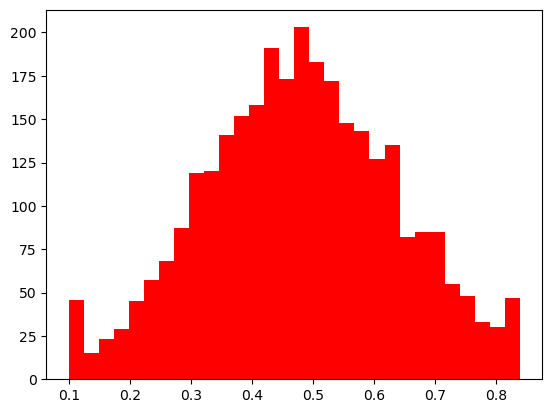

In [9]:
plt.subplot
plt.hist(attendance, bins = 30, color = 'red')
plt.show()

In [10]:
df.head(2)

,Student_ID,JAMB_Score,State_of_Origin,Distance_Category,Program_Type,Academic_Year,Financial_Aid,Disciplinary_Count,Internet_Access,Library_Usage,Cumulative_GPA,Attendance_Rate,Predicted_Dropout
0,1,282,Other,Regional,Science,1,0,0,0,0,2.766964,0.392876,0
1,2,272,Rivers,Local,Arts,3,0,0,1,10,3.017516,0.442986,0


In [11]:
encoder = LabelEncoder()
df['State_of_Origin'] = encoder.fit_transform(df['State_of_Origin'])
df['Distance_Category'] = encoder.fit_transform(df['Distance_Category'])
df['Program_Type'] = encoder.fit_transform(df['Program_Type'])

In [12]:
df.head(2)

,Student_ID,JAMB_Score,State_of_Origin,Distance_Category,Program_Type,Academic_Year,Financial_Aid,Disciplinary_Count,Internet_Access,Library_Usage,Cumulative_GPA,Attendance_Rate,Predicted_Dropout
0,1,282,3,2,2,1,0,0,0,0,2.766964,0.392876,0
1,2,272,5,1,0,3,0,0,1,10,3.017516,0.442986,0


In [13]:
x = df.drop(columns = ['Student_ID','Financial_Aid','State_of_Origin', 'Distance_Category','Program_Type', 'Disciplinary_Count','Library_Usage', 'Internet_Access', 'Predicted_Dropout'])
y = df['Predicted_Dropout']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [16]:
x_train

,JAMB_Score,Academic_Year,Cumulative_GPA,Attendance_Rate
642,187,1,2.563021,0.352087
700,289,1,2.580319,0.355547
226,330,4,4.454827,0.730448
1697,225,3,1.934260,0.226335
1010,276,1,3.624392,0.564361
...,...,...,...,...
1638,243,2,2.180570,0.275597
1095,232,1,2.869805,0.413444
1130,297,1,2.452412,0.329965
1294,233,1,2.512367,0.341956


In [17]:
x_test

,JAMB_Score,Academic_Year,Cumulative_GPA,Attendance_Rate
1801,284,3,2.225031,0.284489
1190,299,2,4.635751,0.766633
1817,219,2,2.726901,0.384863
251,340,2,3.671496,0.573782
2505,330,3,3.694152,0.578313
...,...,...,...,...
104,191,2,3.424932,0.524469
2087,301,4,4.152709,0.670025
599,306,2,3.328115,0.505106
1756,193,4,4.354063,0.710295


In [18]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [19]:
score = accuracy_score(y_pred, y_test)
conf_matr = confusion_matrix(y_pred, y_test)

print(f'\nAccuracy Score: {score}')
print(f'\nConfusion Matrix:')
print(conf_matr)


Accuracy Score: 0.9716666666666667

Confusion Matrix:
[[494  13]
 [  4  89]]


In [20]:
x_train.head(2)

,JAMB_Score,Academic_Year,Cumulative_GPA,Attendance_Rate
642,187,1,2.563021,0.352087
700,289,1,2.580319,0.355547


In [21]:
new_data = pd.DataFrame({'JAMB_Score': [180],
                         'Academic_Year': [4],
                         'Cumulative_GPA': [3.3],
                         'Attendance_Rate': [0.7]})
                          

In [22]:
result = model.predict(new_data)
if result == 0:
    print('Student is in good standing')
else:
    print('Student is at high probability to dropout')

Student is in good standing


In [202]:
#joblib.dump(model,'Student_Dropout_Prediction.jobly')
print('Model has been saved!')

Model has been saved!


In [26]:
pickle.dump(model, open('Student_Dropout_Prediction.pkl', 'wb'))